# Optional: House Prices Data Analysis

![teaser](images/teaser.jpg)

When encountering real life data, there are various augmentations you can apply to improve the readability of said data for neural networks. Additionally, you can do a pre-selection and transformation on the raw features which can also boost your performance.

This notebook can be seen as a starting point to analyize the house prices data introduced in __4_HousePrices-Classification__. We will load the data and show of some useful pandas functions that can help you to select useful transformation choices to improve your regression performance for said notebook. Let's go!

In [1]:
# Installation of seaborn which is used here for visualisation
!pip3 install seaborn

In [2]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

# House Price Data
### Exploration

Make sure to run the *download_datasets.sh* script first before running the upcoming cell. Previously, we provided you with a data loading wrapper function to access the CIFAR10 data. This time around, our input is a csv file which we will load ourselves using [pandas](https://pandas.pydata.org) where we can easily access and alter entries in our data matrix. Let's have a small glimpse how the data looks like!

In [4]:
# Load the data
data = pd.read_csv("../datasets/house_prices_data.csv")
labels = pd.read_csv("../datasets/house_prices_labels.csv")
data['SalePrice'] = labels['SalePrice']

In [26]:
#You can easily get an overview of our features using .info(). Note that not all features are actually numbers!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 80 columns):
MSSubClass       1000 non-null int64
MSZoning         1000 non-null object
LotFrontage      827 non-null float64
LotArea          1000 non-null int64
Street           1000 non-null object
Alley            64 non-null object
LotShape         1000 non-null object
LandContour      1000 non-null object
Utilities        1000 non-null object
LotConfig        1000 non-null object
LandSlope        1000 non-null object
Neighborhood     1000 non-null object
Condition1       1000 non-null object
Condition2       1000 non-null object
BldgType         1000 non-null object
HouseStyle       1000 non-null object
OverallQual      1000 non-null int64
OverallCond      1000 non-null int64
YearBuilt        1000 non-null int64
YearRemodAdd     1000 non-null int64
RoofStyle        1000 non-null object
RoofMatl         1000 non-null object
Exterior1st      1000 non-null object
Exterior2nd      1000 non-nu

In [27]:
# Using the describe function we can get an overview about numerical ranges
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1000.000000,827.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,993.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,56.960000,70.088271,10582.854000,6.135000,5.566000,1971.083000,1984.754000,109.542800,456.256000,42.119000,...,97.492000,47.07300,22.154000,4.078000,14.6840,2.77100,32.134000,6.216000,2007.829000,182814.417000
std,42.395233,24.727977,10423.604539,1.388057,1.118434,30.498234,20.710925,182.186082,474.339455,150.778045,...,126.267618,64.82921,62.559267,33.389771,55.1937,39.32069,323.319126,2.722638,1.336992,81736.545419
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,59.000000,7530.000000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,0.000000,4.000000,2007.000000,130000.000000
50%,50.000000,70.000000,9475.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,0.000000,...,0.000000,28.00000,0.000000,0.000000,0.0000,0.00000,0.000000,6.000000,2008.000000,165000.000000
75%,70.000000,80.000000,11640.500000,7.000000,6.000000,2001.000000,2004.000000,176.000000,738.250000,0.000000,...,171.000000,68.00000,0.000000,0.000000,0.0000,0.00000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,1085.000000,...,736.000000,547.00000,552.000000,508.000000,480.0000,648.00000,8300.000000,12.000000,2010.000000,755000.000000


In [28]:
# Our target variable is the SalesPrice which we explore in detail here
data['SalePrice'].describe()

count      1000.000000
mean     182814.417000
std       81736.545419
min       35311.000000
25%      130000.000000
50%      165000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

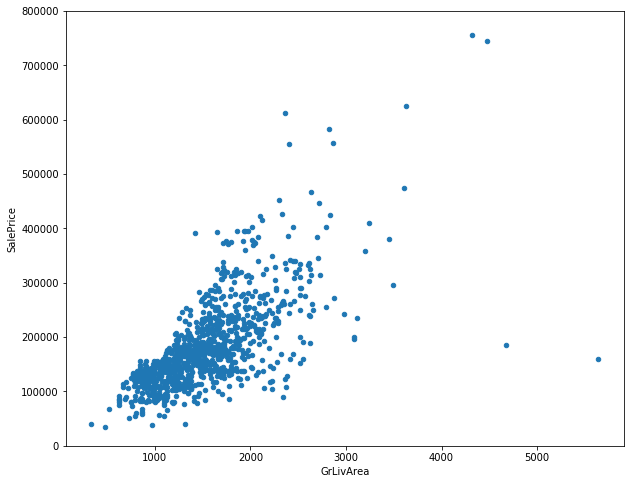

In [29]:
# Relationship with the numerical features. We explore only two here as a sample
# GrLivArea
# TotalBsmtSF
var = 'GrLivArea'
relationship_in_df = pd.concat([data['SalePrice'], data[var]], axis=1)
relationship_in_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

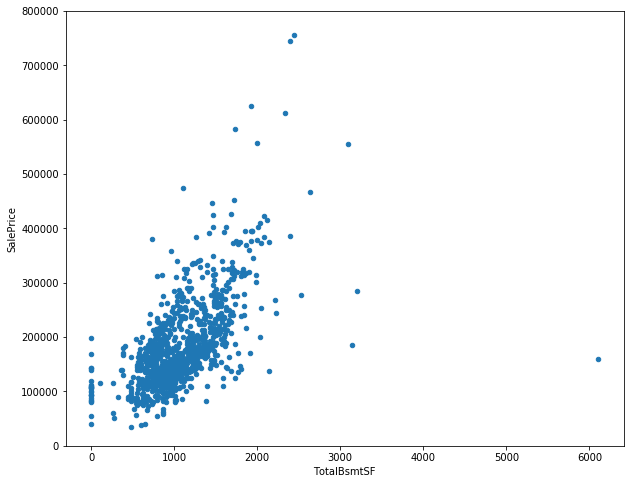

In [30]:
# Scatter plot of totalbsmtsf/saleprice
var = 'TotalBsmtSF'
relationship_in_df = pd.concat([data['SalePrice'], data[var]], axis=1)
relationship_in_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

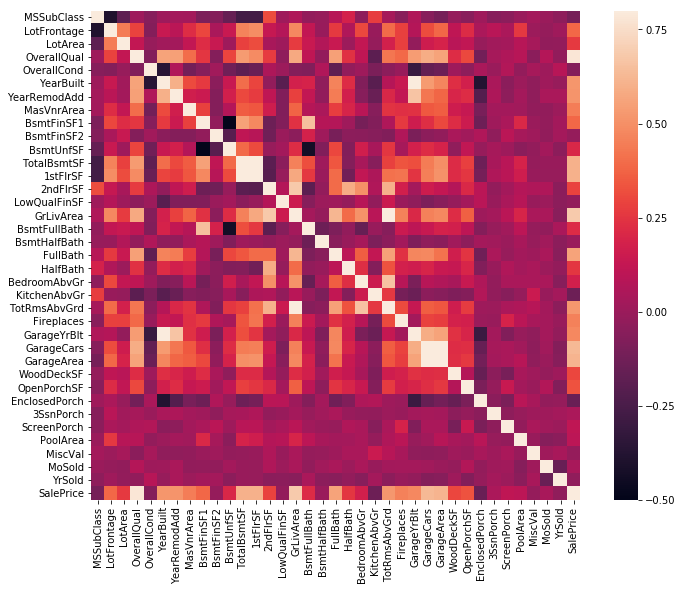

In [31]:
# General correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

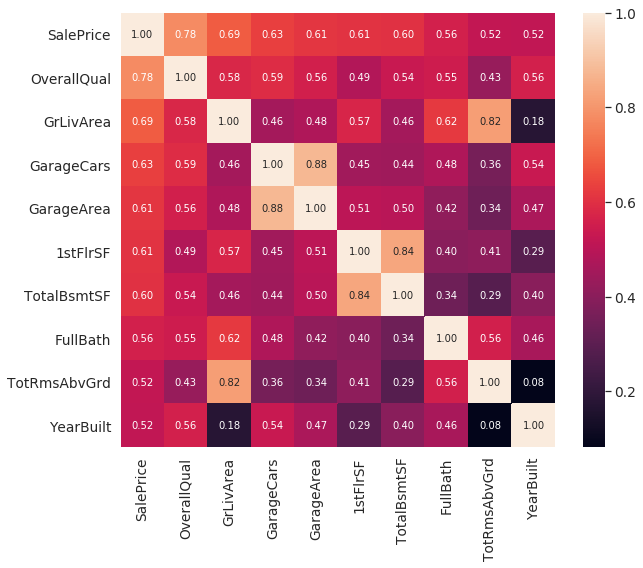

In [32]:
# Saleprice correlation matrix:
# We look at the 10 most correlated variables for our target "Sale Price"
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

This shows that there are certain attributes much more correlated than the others for SalePrice. Next, we explore the scatter plot of selected attributes

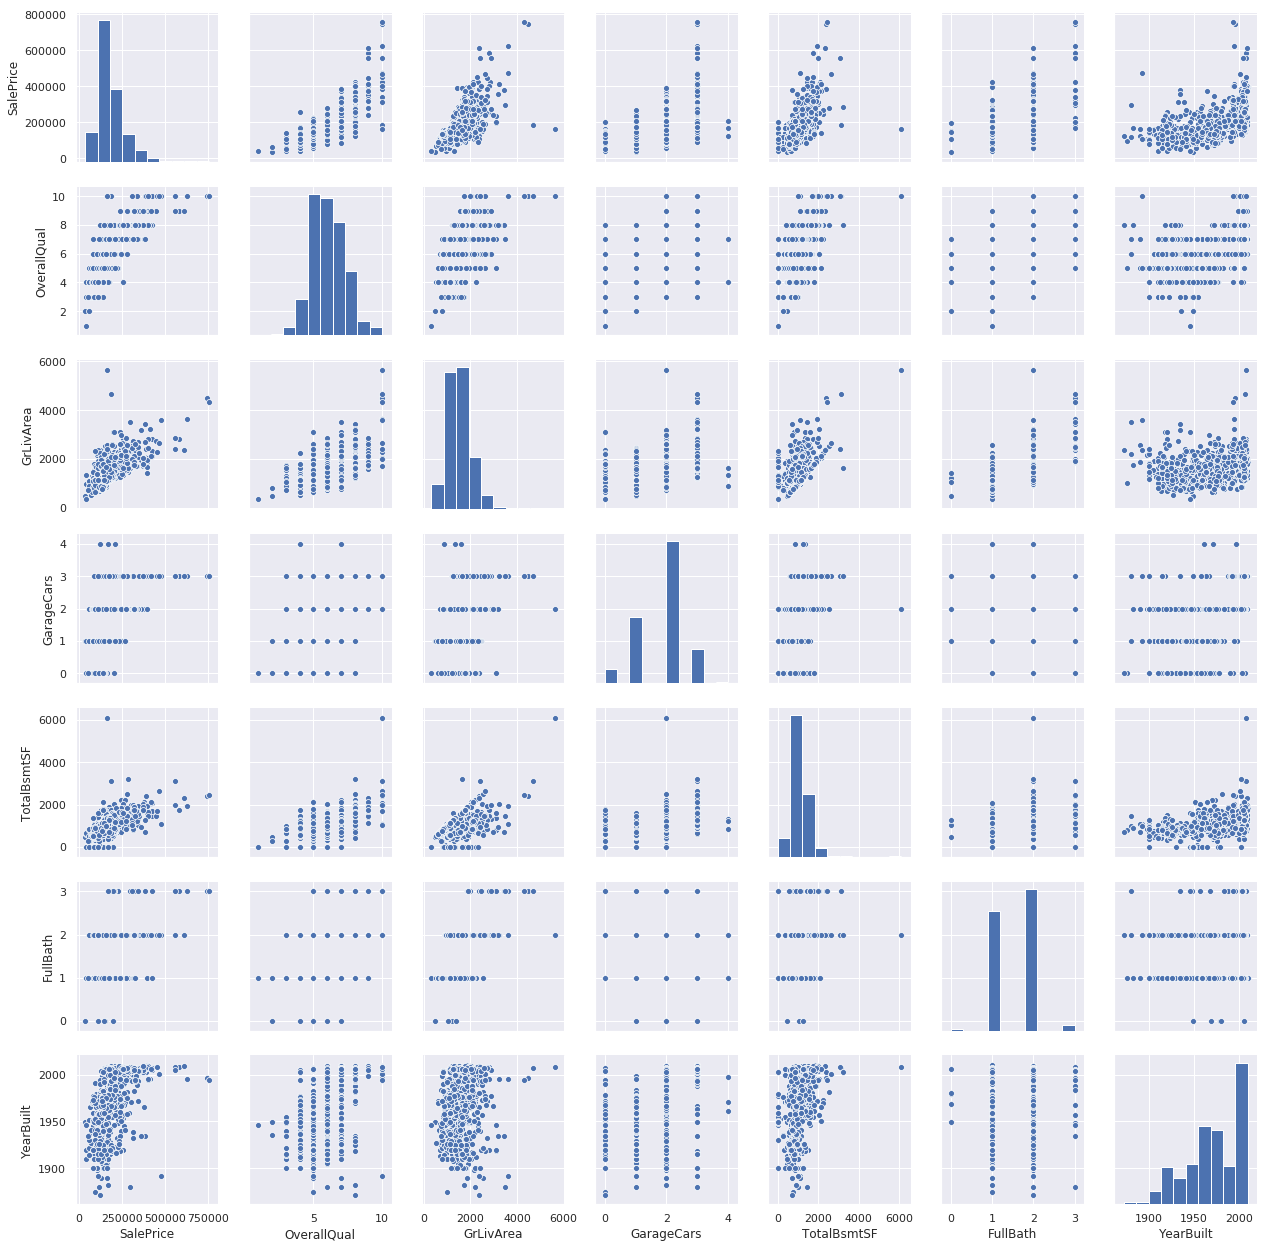

In [34]:
# Scatterplots
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], height = 2.5)
plt.show();

## Follow up steps

You can use the rest of this notebook for your own data exploration and the corresponding selection of useful features or ideas for data transformation which you can then apply in the main house prices notebook to improve your network performance!